In [211]:
import numpy  as np
import pandas as pd


print('numpy  version - ' , np.__version__) 
print('pandas version - ' , pd.__version__) 


# ml
import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

print('sklearn version - ' , sklearn.__version__)

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression

from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, make_scorer, precision_recall_curve
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

numpy  version -  1.20.3
pandas version -  1.3.4
sklearn version -  0.24.2


## 분류모델의 성능평가
- 정확도 : 실 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표
- 문제점? - 이진분류의 경우 모델의 성능을 왜곡할 수 있다.
- 왜 : 데이터의 불균형
- 해결책 : F1 Score(Percision, Recall)

- 정밀도(Percision) : TP / (FP + TP)
- 상대적으로 정밀도가 더 중요한 지표인 경우의 모델? 스팸메일
- 재현율(Recall) : TP / (TP + FN)
- 상대적으로 재현율이 더 중요한 지표인 경우의 모델? 의학(암진단), 금융(사기판별)

In [3]:
titanic_frm = pd.read_csv('./dataset/titanic_train.csv')
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_frm["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
print('2. target, feature로 데이터 분리')

2. target, feature로 데이터 분리


In [15]:
titanic_target = titanic_frm['Survived']
titanic_feature = titanic_frm.drop(['Survived'], axis=1)

print('target type :', type(titanic_target))
print('feature type :', type(titanic_target))

target type : <class 'pandas.core.series.Series'>
feature type : <class 'pandas.core.series.Series'>


In [ ]:
print('3. 전처리 요구사항 :')
print('불필요한 피처 제거 : PassengerID, Name, Ticket')
print('결측값 처리 : age는 평균, cabin은 N, Embarked 는 N')
print('레이블 인코딩 : cabin, embarked')

## 실습1

In [17]:
titanic_feature = titanic_feature.drop(['PassengerId'], axis=1)
titanic_feature = titanic_feature.drop(['Name'], axis=1)
titanic_feature = titanic_feature.drop(['Ticket'], axis=1)

KeyError: "['PassengerId'] not found in axis"

In [20]:
titanic_feature.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [25]:
titanic_feature['Age'].fillna(np.round(np.mean(titanic_feature['Age'])), inplace=True)

In [26]:
titanic_feature['Cabin'].fillna('N', inplace=True)

In [28]:
titanic_feature['Embarked'].fillna('N', inplace=True)

In [31]:
titanic_feature['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [40]:
def mask_cabin(row):
    if row == 'N':
        return 'N'
    else:
        return row[0]

In [50]:
cabin_masked = titanic_feature['Cabin'].apply(mask_cabin)

In [56]:
titanic_feature.drop(['Cabin'],axis=1, inplace=True)
titanic_feature['mask_cabin']=cabin_masked

In [57]:
titanic_feature 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,mask_cabin
0,3,male,22.0,1,0,7.2500,S,N
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,S,N
3,1,female,35.0,1,0,53.1000,S,C
4,3,male,35.0,0,0,8.0500,S,N
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,N
887,1,female,19.0,0,0,30.0000,S,B
888,3,female,30.0,1,2,23.4500,S,N
889,1,male,26.0,0,0,30.0000,C,C


In [154]:
encoder_frm = pd.DataFrame({
    'label_items_Sex' : titanic_feature['Sex'],
    'label_items_mask_cabin' : titanic_feature['mask_cabin'],
    'label_items_Embarked' : titanic_feature['Embarked']
})
encoder_frm

,label_items_Sex,label_items_mask_cabin,label_items_Embarked
0,male,N,S
1,female,C,C
2,female,N,S
3,female,C,S
4,male,N,S
...,...,...,...
886,male,N,S
887,female,B,S
888,female,N,S
889,male,C,C


In [156]:
labeled_frm = pd.get_dummies(encoder_frm)
labeled_frm

,label_items_Sex_female,label_items_Sex_male,label_items_mask_cabin_A,label_items_mask_cabin_B,label_items_mask_cabin_C,label_items_mask_cabin_D,label_items_mask_cabin_E,label_items_mask_cabin_F,label_items_mask_cabin_G,label_items_mask_cabin_N,label_items_mask_cabin_T,label_items_Embarked_C,label_items_Embarked_N,label_items_Embarked_Q,label_items_Embarked_S
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [157]:
type(labeled_frm)

pandas.core.frame.DataFrame

In [77]:
titanic_feature_droped = titanic_feature.iloc[:,[0,2,3,4,5]]
type(titanic_feature_droped)

pandas.core.frame.DataFrame

In [84]:
titanic_concat = pd.concat([titanic_feature_droped,labeled_frm], axis=1, join='inner')

In [85]:
titanic_concat

,Pclass,Age,SibSp,Parch,Fare,label_items_Sex_female,label_items_Sex_male,label_items_mask_cabin_A,label_items_mask_cabin_B,label_items_mask_cabin_C,label_items_mask_cabin_D,label_items_mask_cabin_E,label_items_mask_cabin_F,label_items_mask_cabin_G,label_items_mask_cabin_N,label_items_mask_cabin_T,label_items_Embarked_C,label_items_Embarked_N,label_items_Embarked_Q,label_items_Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,30.0,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

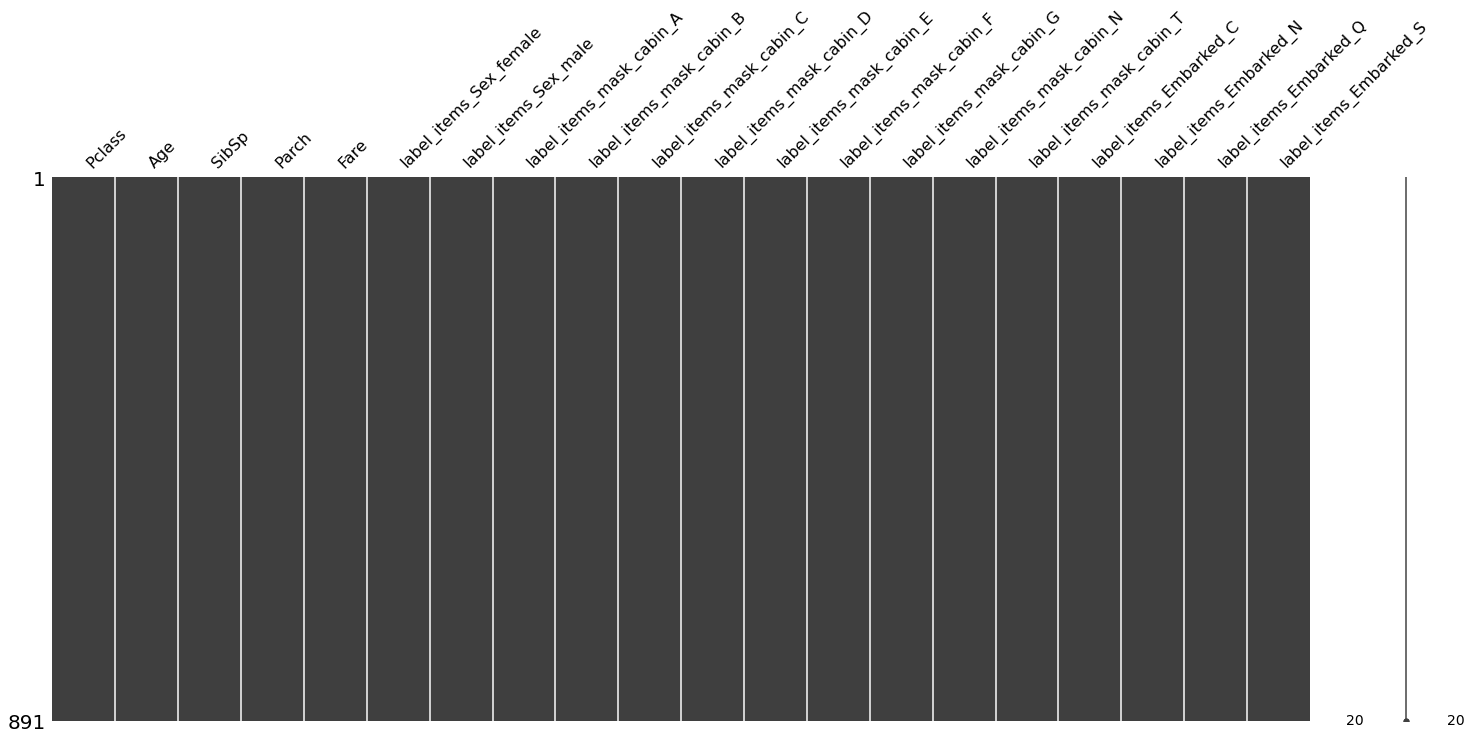

In [87]:
import missingno as msno
msno.matrix(titanic_concat)

In [90]:
print('학습과 테스트 분리 :')
print()
X_train, X_test, y_train, y_test = train_test_split(titanic_concat,
                                                    titanic_target,
                                                    test_size = 0.3,
                                                    random_state = 200)

학습과 테스트 분리 :



In [112]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

def metrics_eval(target, prediction) :
    print('accuracy :', accuracy_score(target, prediction))
    print('recall :', recall_score(target, prediction))
    print('precistion :', precision_score(target, prediction))
    print('f1 score :', f1_score(target, prediction))

In [113]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
print('LogisticRegression :')
print()
metrics_eval(y_test, dt_y_pred)

LogisticRegression :

accuracy : 0.7723880597014925
recall : 0.6407766990291263
precistion : 0.7333333333333333
f1 score : 0.6839378238341969


In [115]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

In [116]:
print('DecistionTreeClassifier :')
print()
metrics_eval(y_test, dt_y_pred)

DecistionTreeClassifier :

accuracy : 0.7388059701492538
recall : 0.6504854368932039
precistion : 0.6633663366336634
f1 score : 0.6568627450980392


In [117]:
print('교차검증 :')
fold = KFold(n_splits=20)
scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'recall' : make_scorer(recall_score),
    'precistion' : make_scorer(precision_score),
    'f1' : make_scorer(f1_score)
}

result = cross_validate(lr_model, X_train, y_train,
                        cv = fold,
                        scoring=scoring)
result.keys()

교차검증 :


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precistion', 'test_f1'])

In [106]:
result['test_accuracy'].mean()

0.816985887096774

## 실습2

In [118]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [119]:
print('유방암 관련 데이터 : 정확도, 재현율(실제 P를 N으로 예측하면 안되기 때문에)')
print('재현율은 실제 양성을 양성으로 예측한 비율이 높아야 성능이 좋은 모델')

유방암 관련 데이터 : 정확도, 재현율(실제 P를 N으로 예측하면 안되기 때문에)
재현율은 실제 양성을 양성으로 예측한 비율이 높아야 성능이 좋은 모델


- 1. 데이터 프레임 생성(feature, target) 포함
- 2. target에 대한 균형 여부 확인
- 3. 데이터 세트 분리
- 4. RandomForestClassifier
- 5. 평가지표 확인

In [122]:
type(cancer)

sklearn.utils.Bunch

In [127]:
cancer_frm = pd.DataFrame(data = cancer.data,
                          columns = cancer.feature_names)

In [130]:
cancer_frm['target'] = cancer.target

In [ ]:
cancer_frm['target'].value_counts()

In [144]:
cancer_frm.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [133]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.3,
                                                    random_state=200)

In [142]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [143]:
print('RandomForestClassifier :')
print()
metrics_eval(y_test, dt_y_pred)

RandomForestClassifier :

accuracy : 0.9649122807017544
recall : 0.9827586206896551
precistion : 0.9661016949152542
f1 score : 0.9743589743589743


In [149]:
print('교차검증 :')
fold = KFold(n_splits=20)
scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'recall' : make_scorer(recall_score),
    'precistion' : make_scorer(precision_score),
    'f1' : make_scorer(f1_score)
}

result = cross_validate(rf_model, X_train, y_train,
                        cv = fold,
                        scoring=scoring)
result['test_recall'].mean()

교차검증 :


0.9646639471639471

## 재현율을 높이기 위한 방법 : GridSearchCV를 이용한 파라미터 튜닝
- n_estimators : tree의 갯수 의미
- max_features : 최대 선택할 피처의 수를 의미
- max_depth : 최대 선택할 트리의 깊이를 의미

In [158]:
param = {
    'n_estimators' : [50, 100, 150, 200],
    'max_features' : [6, 8, 15, 20], ## 무작위로 뽑음
    'max_depth' : [4, 6, 8]
}

grid_search_model = GridSearchCV(rf_model,
                                 param_grid = param,
                                 cv = 20,
                                 refit = True,
                                 scoring = 'recall')
grid_search_model.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [6, 8, 15, 20],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall')

In [159]:
grid_search_model.cv_results_

{'mean_fit_time': array([0.0716327 , 0.14171993, 0.21353503, 0.28254789, 0.07723602,
        0.15337101, 0.22945303, 0.30620902, 0.09710181, 0.19312574,
        0.29302424, 0.38794888, 0.11265268, 0.22365398, 0.33514849,
        0.44580448, 0.0737669 , 0.14923189, 0.22186565, 0.29546068,
        0.0806175 , 0.16107363, 0.24134492, 0.32168006, 0.10520165,
        0.20639759, 0.30935024, 0.40849799, 0.11853753, 0.23994485,
        0.35663067, 0.47537203, 0.07439611, 0.14828452, 0.22146246,
        0.29527947, 0.08184739, 0.1614467 , 0.24100639, 0.32047322,
        0.10349387, 0.20744942, 0.30872134, 0.41717523, 0.12035908,
        0.24022903, 0.35734349, 0.47645775]),
 'std_fit_time': array([0.00097061, 0.00076722, 0.0041682 , 0.00179765, 0.0006826 ,
        0.00079268, 0.00083629, 0.001896  , 0.00081554, 0.0013972 ,
        0.00364017, 0.0051382 , 0.00120503, 0.00592676, 0.00271437,
        0.00372484, 0.00071479, 0.00433269, 0.00207629, 0.00560361,
        0.00096602, 0.00298803, 0.003

In [160]:
grid_search_model.best_params_

{'max_depth': 4, 'max_features': 20, 'n_estimators': 100}

In [163]:
grid_search_model.best_score_

0.9791666666666667

In [164]:
re_estimator = grid_search_model.best_estimator_

In [169]:
best_y_pred = re_estimator.predict(X_test)
metrics_eval(y_test, best_y_pred)

accuracy : 0.9590643274853801
recall : 0.9827586206896551
precistion : 0.957983193277311
f1 score : 0.9702127659574468


### 정밀도(Precision)와 재현율(Recall)을 임의로 조절하는 모델을 생성해야 하는 경우
- 분류 임계값이 낮을수록 positive를 예측할 확률이 높아져 재현율이 증가
- predict_proba()

In [171]:
matrix = [
    [-1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]
]

In [174]:
from sklearn.preprocessing import Binarizer

holder = Binarizer(threshold = 1.1) # 1.1 보다 낮은건 0
print(holder.fit_transform(matrix))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [175]:
titanic_frm = pd.read_csv('./dataset/titanic_train.csv')
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
titanic_target = titanic_frm['Survived']
titanic_feature = titanic_frm.drop(['Survived'], axis=1)

print('target type :', type(titanic_target))
print('feature type :', type(titanic_target))

target type : <class 'pandas.core.series.Series'>
feature type : <class 'pandas.core.series.Series'>


In [177]:
titanic_concat

,Pclass,Age,SibSp,Parch,Fare,label_items_Sex_female,label_items_Sex_male,label_items_mask_cabin_A,label_items_mask_cabin_B,label_items_mask_cabin_C,label_items_mask_cabin_D,label_items_mask_cabin_E,label_items_mask_cabin_F,label_items_mask_cabin_G,label_items_mask_cabin_N,label_items_mask_cabin_T,label_items_Embarked_C,label_items_Embarked_N,label_items_Embarked_Q,label_items_Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,30.0,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [213]:
titanic_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [180]:
print('학습과 테스트 분리 :')
print()
X_train, X_test, y_train, y_test = train_test_split(titanic_concat,
                                                    titanic_target,
                                                    test_size = 0.2,
                                                    random_state = 200)

학습과 테스트 분리 :



In [181]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((712, 20), (179, 20), (712,), (179,))

In [183]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
print('확률예측 값 : predict_proba()')
predict_proba_result =logistic_model.predict_proba(X_text)
print('type :', type(logistic_model.predict_log_proba(X_test)))

확률예측 값 : predict_proba()
type : <class 'numpy.ndarray'>


In [191]:
predict_proba_result[0:3]

array([[0.5937156 , 0.4062844 ],
       [0.92319651, 0.07680349],
       [0.88408149, 0.11591851]])

In [199]:
pred_prob_concat = np.concatenate([predict_proba_result, y_pred.reshape(-1,1)], axis=1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 268 and the array at index 1 has size 179

In [202]:
user_th = 0.3
predict_proba_poitive = predict_proba_result[:, 1].reshape(-1,1)
user_pred = Binarizer(threshold = user_th).fit_transform(predict_proba_poitive)

In [205]:
user_pred

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

In [208]:
print('default')
print()
metrics_eval(y_test, y_pred)
print()
print('user thre', user_th)
print()
metrics_eval(y_test, user_pred)

default

accuracy : 0.7821229050279329
recall : 0.6933333333333334
precistion : 0.7647058823529411
f1 score : 0.7272727272727272

user thre 0.3



ValueError: Found input variables with inconsistent numbers of samples: [179, 268]

## trade-off 시각화
- precision_recall_curve(실제값, 예측 확률 값) : 임계값 변화에 따른 평가지표를 반환
- 반환값 : 정밀도, 재현율, 임계 값

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
predict_proba_poitive = predict_proba_result[:, 1]
precision, recall, th = precision_recall_curve(y_test, predict_proba_poitive)
print('precision type :', type(precision))
print('recall type :', type(recall))
print('th type :', type(th))

ValueError: Found input variables with inconsistent numbers of samples: [179, 268]

In [222]:
precision[:]

ValueError: Precision must be int or format string, not '[:]'

In [220]:
plt.figure(figsize=(15,5))

plt.plot(th, precision, linestyle='--', label='precision')
plt.plot(th, recall, linestyle='-', label='recall')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.grid()
plt.legend()
plt.show()
plt.close()

NameError: name 'th' is not defined

<Figure size 1080x360 with 0 Axes>